<a href="https://colab.research.google.com/github/dianakang/K_digital_likelion/blob/master/20201218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 분류

In [1]:
# 분류(Classification)란 회귀와 함께 머신러닝에서 가장 기초적인 데이터 분석 방법 중 하나이다. 
# 분류란 데이터가 어느 범주(Category)에 해당하는지 판단하는 문제로, 유사한 것들을 같은 범주로 묶는다.

In [2]:
# cf) 회귀에서는 알고리즘의 퍼포먼스를 측정하기 위해 잔차의 제곱의 합(Sum of Squared Error, SSE), 잔차의 제곱의 평균(Mean Squared Error, MSE) 즉, '실수'를 사용 
#     분류에서는 예측이 정답을 얼마나 맞혔는지에대한 '정확도'를 측정하며, 보통 '퍼센트(%)'로 나타낸다.

In [3]:
# '회귀'는 어떤 데이터들의 특징(feature)을 토대로 값을 예측하는 것이다.
# 회귀의 결과는 실수 값이며 연속성을 갖는다. 그래프를 생각하면 됨
# 회귀는 정답이 있는 상태여서 더 정확한 값을 예측하게 하는 지도학습이다.

## 4.1 이항분류

In [4]:
# 이항 분류(Binary Classification)는 정답의 범주가 두 개인 분류이다.

In [5]:
## 와인은 크게 레드 와인과 화이트 와인의 두 종류로 나뉜다.
## 그런데 우리는 와인의 색깔을 모르는 상태에서 데이터만 보고 와인을 분류할 수 있을까?  쉽지 않을 것이다. 
## 실습을 위해 일단 와인 데이터세트를 불러와보자.

In [6]:
# 와인 데이터셋 불러오기
import pandas as pd       # 데이터 정제 및 분석을 위한 라이브러리로 판다스(pandas)를 임포트 했다.
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

## 12개의 속성으로 와인의 종류(레드/화이트)를 분류하고 있다. 
## 하지만 이처럼 red, white 두 데이터프레임으로 데이터가 분리되어 있으면 우선 이 두 데이터프레임을 하나로 합쳐야한다.
## 그 전에 중요한 것은 이 와인이 레드 와인인지 화이트 와인인지 표시해주는 속성을 추가해야한다.

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [7]:
## 그럼 이제 이 두 작업을 수행해보자.
## 1. 두 데이터프레임을 하나로 합치기
## 2. 데이터 라벨링(레드 와인과 화이트 와인으로 구분)

In [8]:
## 데이터프레임에 새로운 속성을 추가하는 방법은 데이터프레임이 파이썬의 사전(dict)타입인 것처럼 속성명과 값을 직접 지정하면 된다. ex) red['type']= 0
## 여기서는 레드와인과 화이트 와인을 구별하는 속성의 이름을 type으로 정의했고, 레드와인을 0, 화이트 와인은 1로 지정했다.

red['type'] = 0     
white['type']= 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])   # pd.concat()함수는 두 개의 데이터프레임을 합치기 위해 사용한다.
print(wine.describe())   # describe()함수를 사용해 데이터프레임의 간단한 통계 정보를 확인한다.

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

In [9]:
## type 속성을 보면 최소값(min)이 0, 최대값(max)이 1임을 알 수 있다.
## 그런데 평균(mean)은 0.75가 나오는 것을 보면 0에 해당하는 값보다 1에 해당하는 값이 더 많을 것을 예상할 수 있다.

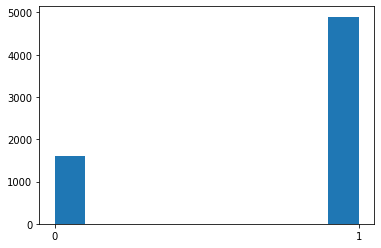

1    4898
0    1599
Name: type, dtype: int64


In [10]:
## 정확한 수치를 알아보기 위해 value_counts()로 type 속성에 존재하는 각 값의 수를 출력해보자.

# 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])   # 눈금표시
plt.show()

print(wine['type'].value_counts())

## 속성을 이용해 히스토그램을 그려보면 '화이트 와인이 레드와인보다 약 3배 정도 많다'는 것을 알 수 있다.
## 하지만 딥러닝 학습을 위해서는 레드 와인과 화이트 와인이 비슷한 비율로 들어가도록 데이터를 랜덤하게 섞어야한다.

In [11]:
## 데이터를 섞어주기 전에 해야 할 일이 하나 더 있다. 바로 '데이터 정규화'이다.
## 외부에서 불러오는 데이터의 경우에는 어떤 값으로 구성되어 있는지 알수 없기 때문에 이 과정이 꼭 필요하다. 
## 데이터프레임 속성을 알기 위해서는 info()함수를 사용한다. 

# 데이터 파악하기 <- info()함수
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [12]:
## 출력된 13개의 속성 모두 non-null로 표시되어 null값은 없다는 것을 알 수 있다.
## 11개는 float64, 2개는 int64로 모두 숫자값이기 때문에 안전하게 정규화를 진행할 수 있다. 

In [13]:
# 데이터 정규화
wine_norm = (wine-wine.min())/(wine.max()-wine.min())   # 정규화 공식
print(wine_norm.head())
print(wine_norm.describe())  # 계산 결과가 올바른지 확인하기 위한 출력 명령문

## 출력 결과 min이 모두 0, max가 모두 1인 것을 확인할 수 있다.

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [14]:
# 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1) 
## sample()함수는 전체 데이터프레임에서 frac 인구로 지정된 비율만큼의 행을 랜덤하게 뽑아서 새로운 데이터프레임을 만든다.
## frac = 1은 100%, 즉 모든 데이터를 뽑아서 섞는 것이다.

print(wine_shuffle.head())
## type을 보면 데이터가 랜덤하게 섞여 0과 1이 불규칙하게 보인다.

wine_np = wine_shuffle.to_numpy()  ## to_numpy()함수는 데이터프레임을 넘파이 array로 변환한다.
print(type(wine_np))  ## type()함수를 통해 현재 넘파이의 array로 변환된 것을 확인할 수 있다.

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
4662       0.289256          0.060000     0.216867  ...  0.637681  0.500000   1.0
1172       0.487603          0.226667     0.277108  ...  0.623188  0.500000   0.0
3711       0.305785          0.106667     0.186747  ...  0.159420  0.500000   1.0
4826       0.181818          0.173333     0.174699  ...  0.391304  0.500000   1.0
1432       0.223140          0.186667     0.295181  ...  0.594203  0.666667   1.0

[5 rows x 13 columns]
<class 'numpy.ndarray'>


In [15]:
# 그럼 이제 데이터를 훈련 데이터와 테스트 데이터로 나눠보자.
# 학습을 위해서는 각 데이터를 입력과 출력인 X와 Y로 먼저 분리해야한다.

In [16]:
# train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
print(train_idx)
## 80%에 해당하는 데이터를 훈련데이터와 검증데이터로 만들기 위해 wine_np의 수의 80%에 해당하는 인덱스를 int값으로 저장한다. (6497 -> 5197)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
## 그 다음 이 인덱스를 이용해 wine_np를 분리한다.
## 넘파이 array에서는 2차원 이상의 인덱스에 접근할 때 쉼표(,)를 사용하기 때문에 쉼표를 이용해 X와 Y도 구분해준다.

print(train_X[0])
print(train_Y[0])
print(train_X[0])
print(train_Y[0])

## 12개의 기존 속성을 X가 되고 새롭게 추가한 type은 Y가 된다.

5197
[0.2892562  0.06       0.21686747 0.11656442 0.03156146 0.14930556
 0.24193548 0.108155   0.3255814  0.10674157 0.63768116 0.5       ]
1.0
[0.2892562  0.06       0.21686747 0.11656442 0.03156146 0.14930556
 0.24193548 0.108155   0.3255814  0.10674157 0.63768116 0.5       ]
1.0


In [17]:
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)   
## tf.keras.utils에서 불러오는 to_categorical은 분류 문제에서 자주 쓰이는 함수이다. 이는 정답 행렬은 원 - 핫 인코딩(One-Hot-Encoding)방식으로 바꾼다.
## 원 - 핫 인코딩은 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지 인덱스에는 모두 0을 넣는 방식이다.

test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)   # num_classes는 정답 클래스의 개수 
## 이 문제에서는 정답 클래스가 레드 와인, 화이트 와인 2개이므로 2를 넣었다.

print(train_Y[0])  # 화이트 와인(1.0)
print(test_Y[0])   # 레드 와인(0.0)

## 1의 위치는 정답 클래스의 인덱스와 동일하다.

[0. 1.]
[0. 1.]


In [18]:
# 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')   # 분류모델이기 때문에 마지막 레이어의 활성화함수로 소프트맥스(softmax)를 사용한다.
])

## 소프트맥스라는 단어는 max함수와 비슷한 의미로, max 함수의 약화된 버전이라고 생각할 수 있다. 
## [2,1,0]에 max함수를 취하면 [2,0,0]이 될 것이다. 소프트맥스는 이보다는 좀 더 약하지만 큰 값을 강조하고 작은 값은 약화시킨다.
## 뿐만 아니라 e를 밑으로 하는 지수 함수를 취하기 때문에 0이나 음수에도 적용가능하다.
## 분류 문제나 언어 RNN 에서의 다음 토큰 예측, 강화학습에서 에이전트의 행동 확률을 구하는 결과값 확률을 구할 때 쓰인다.

## 여기서는 예측값이 레드와인인 확률과 화이트 와인일 확률을 구하는데 쓰인다. 즉, 결과값의 확률이 1일 것이다.
## 뿐만 아니라 마지막 레이어의 뉴런의 개수가 2로 설정되어 있다는 것은 원 - 핫 인코딩으로 변환한 정답의 차원 수와 동일한 값임을 알 수 있다.
## 즉, 정답을 맞춘 수를 전체 와인의 수로 나누면 분류 네트워크의 예측률을 계산할 수 있다.

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),   # compile = 최적화
loss='categorical_crossentropy', metrics=['accuracy'])  # 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 정확도(accuracy)를 설정하는 것이 필수이다.
## 'categoricall_crossentropy' = 범주에 쓰이는 분류_ 신경망에서 softmax를 통과한 확률분포 벡터 Q와 실제 정답의 확률분포 벡터 P 사이의 교차엔트로피

model.summary()
## 이렇게 인수를 모두 설정하면 모델의 학습 history에 loss와 accuracy가 함께 저장된다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
## validation_split : 검증데이터 비율

## 학습 과정에서는 '학습 데이터의 정확도'와 '검증 데이터의 정확도'가 각각 'accuracy', 'val_accuracy' 라는 이름으로 표시된다.

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.3230 - accuracy: 0.8264 - val_loss: 0.0429 - val_accuracy: 0.9892
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9844 - val_loss: 0.0449 - val_accuracy: 0.9915
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9890 - val_loss: 0.0546 - val_accuracy: 0.9785
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0414 - val_accuracy: 0.9846
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9834 - val_loss: 0.0684 - val_accuracy: 0.9854
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9843 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9907 - val_loss: 0.0449 - val_accuracy: 0.9962
Epoch 

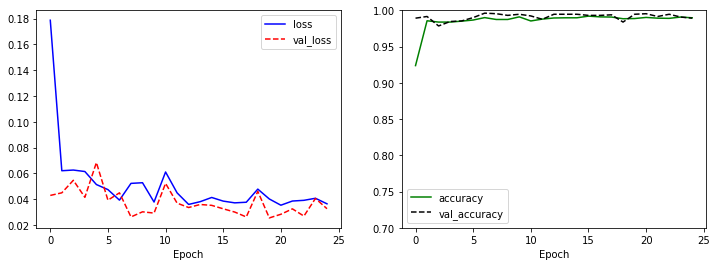

In [21]:
# 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))   # 시각화 크기 지정

plt.subplot(1,2,1)   # 시각화 구역을 설정
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend() # 범례

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)   # y축 범위
plt.legend()

plt.show()

In [22]:
# 분류모델 평가
model.evaluate(test_X, test_Y)

## 정확도가 0.99%로 거의 오차 없이 레드와인과 화이트 와인을 분류하는 것을 확인할 수 있다.

41/41 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 0.9923


[0.034860026091337204, 0.9923076629638672]

# 4.2 다항분류

In [23]:
## 다향분류란 범주의 수가 2개를 초과하는 경우이다.
## 앞의 와인 데이터세트에는 와인의 품질을 0에서 10까지의 숫자로 구분하고 있으므로 데이터를 다항 분류의 범주로 사용할 수 있다.
## 그래서 이번에는 와인의 색깔 대신 와인의 품질을 예측해볼 것이다.
## 일단 품질 데이터가 어떤 비율로 구성되어 있는지 알아보자.

In [24]:
# 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

## descirbe()함수로 통계정보를 확인해보면, 레드와인과 화이트와인을 합친 wine 데이터에서 min값이 3, max 값이 9인 것을 확인할 수 있다.
## 또 value_count()함수로 각 분류의 개수를 확인해보면 각 항목의 수가 균일하지 않고 꽤 차이가 납니다.
## 좀 더 정확한 정보를 알기 위해 히스토그램을 시각화해보자.

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


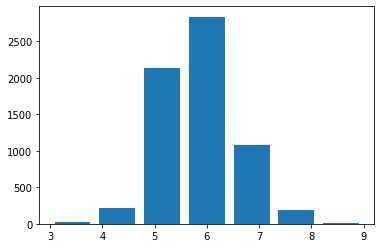

In [25]:
# 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [26]:
## 데이터의 양이 작고 범주의 수가 너무 많은 데다 히스토그램에서 볼 수 있듯이 각 데이터의 숫자가 차이나기 때문에 모든 범주에 대한 분류는 어려울 것이다.
## 그래서 범주를 크게 세 가지로 재분류하겠다. (품질 3 ~ 5는 나쁨, 7 ~ 9는 좋음, 양쪽에 속하지 못하는 6은 보통으로 분류한다.)

In [27]:
# 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0    ## loc = 특정 데이터의 '인덱스'를 골라내는 역할
## 이 때 대괄호 안에 인수를 하나만 넣으면 행을 골라내고, 쉼표(,)를 포함한 두 개의 인수를 넣으면 행, 열을 골라낸다.

wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [28]:
data = [['Apple', 11], ['Banana', 23], ['Coconut', 35]]
df = pd.DataFrame(data, columns = ['Fruit', 'Count'])
print(df)
print()
print(df.loc[0])    # 첫 번째 행
print()
print(df.loc[0,'Fruit'])    # 첫 번째 행의 Fruit 열 = 'Apple'

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35

Fruit    Apple
Count       11
Name: 0, dtype: object

Apple


In [29]:
# 품질을 3개의 범주 (좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts()) 
## 이렇게 품질 데이터를 재분류한 뒤에 value_counts()로 각 분류의 항목 수를 살펴보면 어느 정도 비슷해진 것을 알 수 있다.
## 각 항목을 구성하는 수가 너무 작거나 너무 많으면 분류가 잘 안되기 때문에 수를 비슷하게 맞춰주는 것이 좋다.
## 그 다음 할 일은 데이터 정규화 및 훈련 데이터와 테스트 데이터의 분리이다.

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [30]:
# 데이터 정규화(normalization) 및 train, test 데이터 분리
del wine['quality'] ## wine 데이터 품질 속성 삭제

In [31]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())  # 정규화 (*데이터를 0과 1사이로 스케일 조정) 
wine_shuffle = wine_norm.sample(frac=1)  # 랜덤으로 섞기
wine_np = wine_shuffle.to_numpy()   # array 전환

In [32]:
# 학습 데이터와 테스트 데이터로 분할
train_idx = int(len(wine_np) * 0.8)   # 와인 데이터 세트 전체 인덱스 확인
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]  # 학습 데이터 X/Y 분할
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]  # 테스트 데이터 X/Y 분할
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3) # 학습 데이터 원-핫 인코딩
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)  # 테스트 데이터 원-핫 인코딩
## 종속 변수에 대하여 to_categorical()을 활용해 학습을 원할하게 하기위한 원-핫 인코딩 처리를 수행하였다.

In [33]:
# 개념 비교
## Regularization - 모델의 복잡도를 줄이는 방식 ex) Early stopping(조기종료)- 콜백함수
## Standardizaion(표준화) - Z 함수 (평균0, 표준편차1인 표준 정규 분포의 데이터로 만드는 것 / 평균을 기준으로 얼마나 떨어져 있는지 살펴볼 때 사용)

In [34]:
# 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)  # validation_split : 검증데이터 비율

## 마지막 레이어의 뉴런 수가 2가 아닌 3이 된 것 외에는 동일한 구조의 네트워크를 사용했다.
## 학습을 진행해보면 분류가 레드, 화이트의 2개일 때 보다는 성적이 잘 안나오지만 그래도 검증데이터에 대해 약 81%의 분류 성적을 내고있다.

Epoch 1/25
122/122 [==============================] - 1s 3ms/step - loss: 0.7302 - accuracy: 0.6869 - val_loss: 0.4903 - val_accuracy: 0.7985
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8139 - val_loss: 0.4388 - val_accuracy: 0.7985
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8052 - val_loss: 0.4095 - val_accuracy: 0.7985
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8082 - val_loss: 0.4004 - val_accuracy: 0.8069
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8164 - val_loss: 0.3958 - val_accuracy: 0.8115
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8119 - val_loss: 0.3942 - val_accuracy: 0.8208
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8338 - val_loss: 0.3927 - val_accuracy: 0.8162
Epoch 

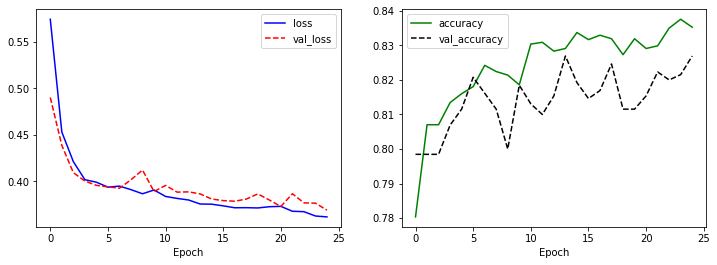

In [35]:
# 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-',label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [36]:
# 다항 분류 모델 평가
model.evaluate(test_X, test_Y)
## 학습 결과를 시각화해보면 이항 분류보다 정답을 찾기 어려운 문제이기 때문에 val_loss가 중간에 뛰기도 하고 전반적으로 loss보다 크다는 것을 알 수 있다.
## 학습을 계속하면 loss는 꾸준히 작아지겠지만 네트워크가 훈련 데이터에 과적합되기 때문에 val_loss는 증가하기 시작할 것이다.

## 테스트 데이터(val_accuracy)로 평가하면 정확도는 검증 데이터(accuracy)의 정확도인 81.92% 보다 조금 더 낮게 나오고 있음을 알 수 있다.
## 데이터의 구성이 균일하지 않기 때문에 이 이상으로 좋은 성과를 내기 위해서는 네트워크의 크기를 키워보거나 학습률을 조정해보는 등의 노력을 해야한다. 

41/41 [==============================] - 0s 843us/step - loss: 0.3911 - accuracy: 0.8223


[0.3911156952381134, 0.8223077058792114]